In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import sys
sys.path.append("..")
import ODE_Dynamics as od
import math
import simulation as sim
from random import sample

In [2]:
# beta is the rate at which virus infects host cells
# Higher value of beta means faster recovery
# We set mu_b to get peak viral load value around day 7

mu_b = 12
sigma_b = 1

In [3]:
sample_size = 20
k = 1
index = 1
beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
L = 0.0025/beta
    
V0 = np.random.normal(1E3, 1E2, 1)
X0 = 1E6
Y0 = V0
    
par=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0,V0,X0,Y0]])
init_state=(np.array([[V0,X0,Y0]], dtype=np.float32))
while index <= sample_size - 1:
    beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
    L = 0.0025/beta
        
    V0 = np.random.normal(1E3, 1E2, 1)
    X0 = 1E6
    Y0 = V0
        
    par_new=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0,V0,X0,Y0]])
    par = np.concatenate((par, par_new), axis = 0)
        
    init_state_new=(np.array([[V0,X0,Y0]], dtype=np.float32))
    init_state = np.concatenate((init_state, init_state_new), 0)

    index +=1       

vpar = tf.constant(par, dtype=tf.float32)
    

In [4]:
vm = od.ViralDynamics(vpar)
D_Vir = vm.Ndim
initial_state = vpar[...,-D_Vir:]
st1 = 0.0
vdyn_initial_time = st1
st2 = 20
vtimes = tf.constant(np.arange(st1, st2, step = 1, 
                                            dtype=np.float32))

DP = tfp.math.ode.DormandPrince()
results = DP.solve(vm.RHS, vdyn_initial_time, initial_state,
                           solution_times = vtimes)

vload = results.states[...,0]  
# But this has shape self.vtimes.shape[0] + vpar.shape[:-1].
# We want vpar.shape[:-1] + self.vtimes.shape[0]
r = len(vload.shape)
p = (np.arange(r) + 1) % r
vload = tf.transpose(vload, perm = p)

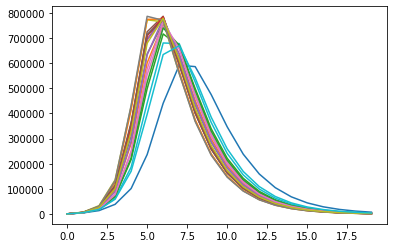

In [5]:
import matplotlib.pyplot as plt
t = results.times
for i in range(sample_size):
    plt.plot(t, vload[i,:])

In [6]:
print(sim.testing_distribution(vload))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.8, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
